## Importing libraries

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
sns.set_style('whitegrid')
# Importing ordinal encoder
import category_encoders as ce
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [377]:
gem_df=pd.read_csv('cubic_zirconia.csv',index_col=0)
gem_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


## Basic Descriptive Analaysis

In [378]:
# Rows and columns
print('The number of rows/ records in the dataset are ', gem_df.shape[0])
print('The total features in the dataset are ',gem_df.shape[1])

The number of rows/ records in the dataset are  26967
The total features in the dataset are  10


In [379]:
gem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


We have float, integers and strings as object types.

From the information given to us in data dictionary, we know the features- cut, color and clarity are ordinal features and hence can be encoded likewise (which we'll be doing ahead. )

In [381]:
# Descriptive Analysis
gem_df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


**Findings:**
i) Mean and median of all the variables are almost in similar ranges.

ii) x, y and z have minimum values of zero. But, since these are dimensional variables, hence can't be equal to zero.

iii) Also, y and z have max values quite far from the 75% values. Implies error in recording.

In [382]:
# For categorical variables
categorical_df=gem_df.select_dtypes(include=['object'])
print('The count for different categories in CUT feature is\n',categorical_df['cut'].value_counts())
print('The count for different categories in COLOR feature is\n',categorical_df['color'].value_counts())
print('The count for different categories in CLARITY feature is\n',categorical_df['clarity'].value_counts())

The count for different categories in CUT feature is
 Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64
The count for different categories in COLOR feature is
 G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64
The count for different categories in CLARITY feature is
 SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64


We will check for distribution of each variable in the univariate analysis part.

In [383]:
# Check for null values
gem_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

Depth  has 697 missing values. We have two options-

i) Impute the missing values with mean or median, or

ii) Entirely drop the missing rows


I am not a big fan of dropping data, hence will be imputing with mean or median.

All other features have no missing data

# **Exploratory Data Analysis (EDA)**

## Data Preprocessing

#### 1. Checking for duplicates

In [384]:
duplicated=gem_df.duplicated()
duplicated.sum()

34

Hence, there are 34 duplicated rows in the dataset.

In [385]:
# Removing duplicate records.
print('Shape of original dataset- ',gem_df.shape)
gem_df.drop_duplicates(inplace=True)
print('Shape of dataset after removing duplicates- ',gem_df.shape)

Shape of original dataset-  (26967, 10)
Shape of dataset after removing duplicates-  (26933, 10)


**Solved**-The 34 duplicate records have been removed from the dataset

#### 2. Imputing the missing values in depth with the mean

In [386]:
gem_df=gem_df.fillna(value=gem_df['depth'].mean())

In [387]:
gem_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

Hence, no more missing values

#### 3. Encoding the categorical variables

Since all the categorical variables, i.e., cut,color and quality have an order in their values, hence can be encoded ordinally in that order

In [388]:
# Label Encoding 

gem_df_int=gem_df.replace({'cut':{'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5},
                            'color':{'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7},
                            'clarity':{'I3':1,'I2':2,'I1':3,'SI2':4,'SI1':5,'VS2':6,'VS1':7,'VVS2':8,'VVS1':9,'IF':10,'FL':11}})

In [389]:
gem_df_int.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

#### 4. Correction in dimension variables

In [391]:
# Since dimensions can never be zero
gem_df[(gem_df['z']==0) | (gem_df['y']==0) | (gem_df['x']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5822,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6035,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10828,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12499,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12690,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17507,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18195,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23759,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [392]:
# Dropping these rows since these are only 8 in number and won't have an affect on the dataset
gem_df=gem_df[gem_df['z']!=0]

Rest of the cleaning like removing outliers will be done in Univariate Analysis.

### **Univariate Analysis**

### Finding skew values of all numerical features

In [414]:
# getting all the numeric columns in a list
gem_df_num=gem_df.select_dtypes(exclude=['object'])
numeric_cols=[]
for i in gem_df_num.columns:
    numeric_cols.append(i)   

# Getting the skew values for all columns
skew_values=[]
for i in numeric_cols:
    sk=gem_df[i].skew()
    skew_values.append(sk) 

# Creating dataframe
skew_data=list(zip(numeric_cols,skew_values))
skew_df=pd.DataFrame(skew_data,columns=['Feature','Skewness'])

In [415]:
skew_df

,Feature,Skewness
0,carat,1.114871
1,depth,-0.025357
2,table,0.764890
3,x,0.402010
4,y,3.888607
5,z,2.639529
6,price,1.619055


Findings:- Fetaures like carat,y,z and price are heavily right skewed. While only depth is marginally left skewed

In [448]:
# Creating functions for whole outier removal process
# Using the 1.5IQR Rule to get and remove outliers

# getting initial info of the variable
def initial_data(col):
    fig,ax=plt.subplots(1,2,figsize=(16,6))
    plot=sns.boxplot(col,ax=ax[0])
    plot_dist=sns.distplot(col,kde=True,ax=ax[1])
    print('{} variable has a skew of {} where median is {} and mean is {}'.format(col.name,col.skew(),col.median(),col.mean()))

# Creating a function to get the IQR
def quartile_values(col):
    q1=np.quantile(col,0.25)
    q3=np.quantile(col,0.75)
    med=np.median(col)
    iqr=q3-q1
    upper_bound=q3+(1.5*iqr)
    lower_bound=q1-(1.5*iqr)
    print('Interquartile range {}\nUpper Bound {}\nLower Bound{}'.format(iqr,upper_bound,lower_bound))

# Create a funcion to get all the outliers
def outliers(col):
    q1=np.quantile(col,0.25)
    q3=np.quantile(col,0.75)
    iqr=q3-q1
    upper_bound=q3+(1.5*iqr)
    lower_bound=q1-(1.5*iqr)
    out=col[(col<=lower_bound) | (col>=upper_bound)]
    return out

# Creating function to remove outliers
def rem_outliers(col):
    q1=np.quantile(col,0.25)
    q3=np.quantile(col,0.75)
    iqr=q3-q1
    upper_bound=q3+(1.5*iqr)
    lower_bound=q1-(1.5*iqr)
    col=col[(col>=lower_bound) & (col<=upper_bound)]
    fig,ax=plt.subplots(1,2,figsize=(16,6))
    plot=sns.boxplot(col,ax=ax[0])
    plot_dist=sns.distplot(col,kde=True,ax=ax[1])

#### 1. Carat Variable

carat variable has a skew of 1.1148713623791096 where median is 0.7 and mean is 0.7978209842154028


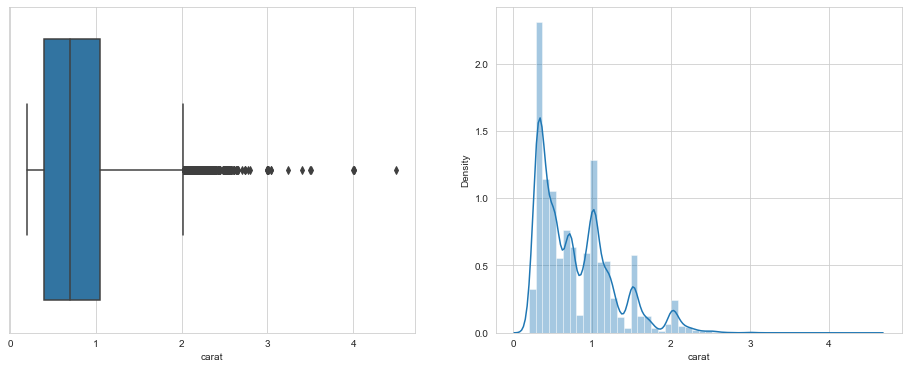

In [449]:
# Column distribution before cleaning
initial_data(gem_df['carat'])

In [450]:
# Getting IQR values for carat
quartile_values(gem_df['carat'])

Interquartile range 0.65
Upper Bound 2.0250000000000004
Lower Bound-0.5750000000000001


In [451]:
# getting outliers for carat variable
outliers(gem_df['carat'])

80       2.16
125      2.80
136      2.20
264      2.11
282      2.11
         ... 
26681    2.21
26846    2.23
26870    3.24
26925    2.03
26958    2.09
Name: carat, Length: 655, dtype: float64

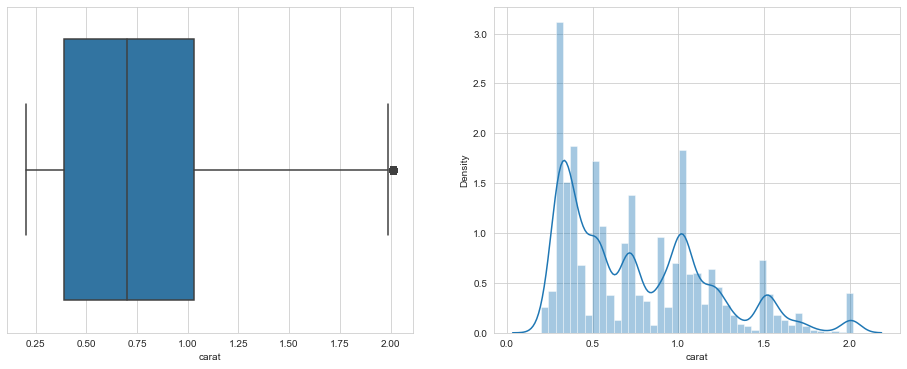

In [452]:
# removing outliers and plotting the boxplot and Getting distribution curve
rem_outliers(gem_df['carat'])

Much better than earlier.

Less number of outliers and better distribution.

Similarly we can do for other numerical variables as well

#### 2. Depth Variable

depth variable has a skew of -0.02535671186260134 where median is 61.8 and mean is 61.74556596909319


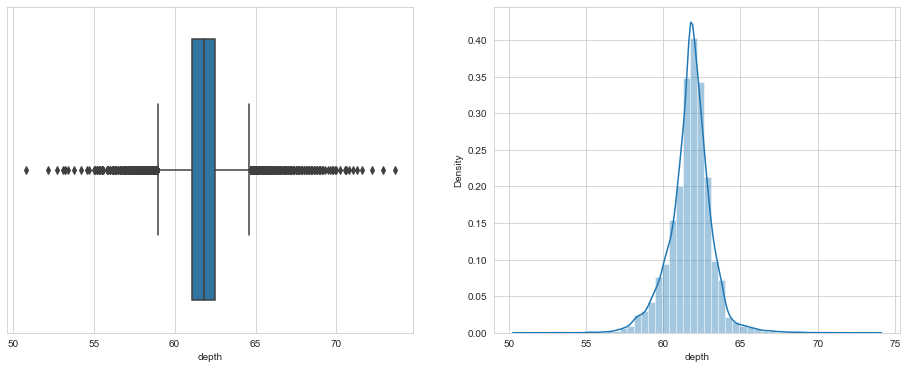

In [453]:
# Column distribution before cleaning
initial_data(gem_df['depth'])

In [454]:
# Getting IQR values for depth
quartile_values(gem_df['depth'])

Interquartile range 1.3999999999999986
Upper Bound 64.6
Lower Bound59.0


In [455]:
# getting outliers for depth variable
outliers(gem_df['depth'])

15       66.2
51       58.0
59       64.9
74       58.4
101      66.8
         ... 
26824    58.9
26843    57.3
26926    66.2
26945    59.0
26953    58.3
Name: depth, Length: 1549, dtype: float64

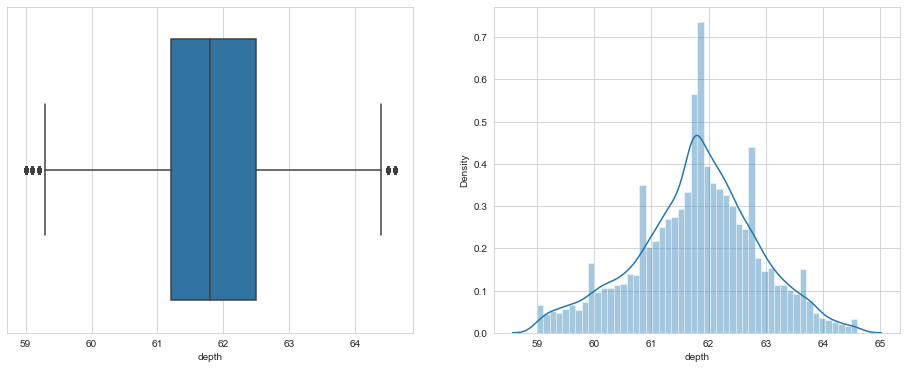

In [456]:
# removing outliers and plotting the boxplot and Getting distribution curve
rem_outliers(gem_df['depth'])

Earlier, huge number of outliers were present on both sides of the box plot(IQR). After cleaning, number of outliers have significantly decreased

#### 3. Table Variable

table variable has a skew of 0.7648896404838926 where median is 57.0 and mean is 57.4553054781801


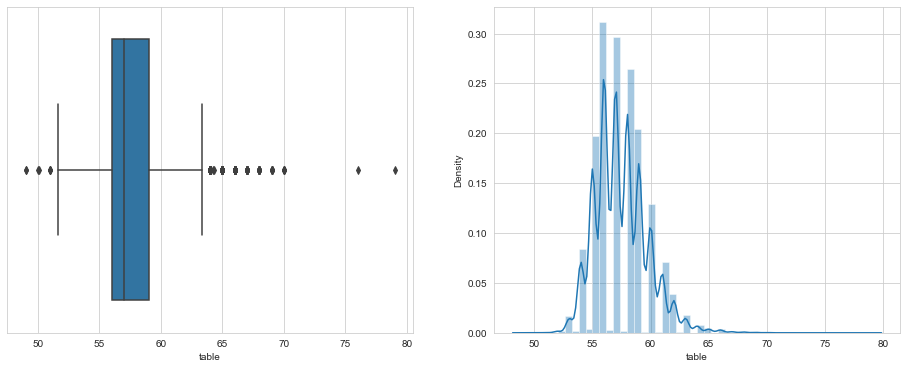

In [458]:
# Column distribution before cleaning
initial_data(gem_df['table'])

In [459]:
# Getting IQR values for table
quartile_values(gem_df['table'])

Interquartile range 3.0
Upper Bound 63.5
Lower Bound51.5


In [461]:
# getting outliers for table variable
outliers(gem_df['table'])

9        64.0
19       64.0
163      64.0
249      64.0
291      65.0
         ... 
26666    64.0
26679    68.0
26732    65.0
26785    67.0
26807    67.0
Name: table, Length: 317, dtype: float64

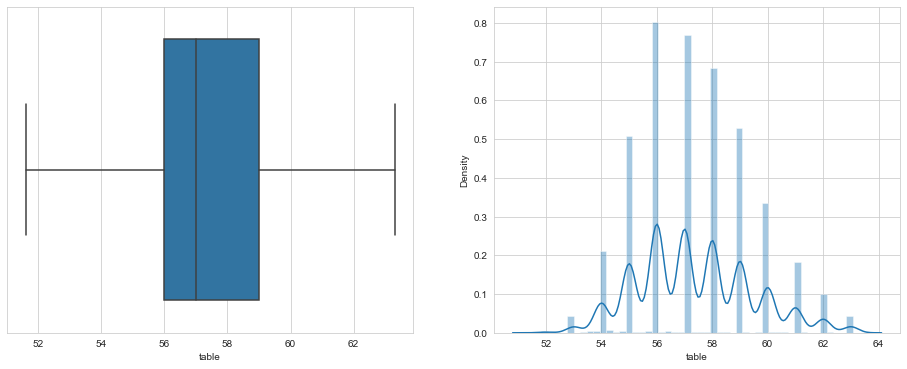

In [462]:
# removing outliers and plotting the boxplot and Getting distribution curve
rem_outliers(gem_df['table'])

Outliers have been removed.

Has many peaks in distribution curve

#### 4. X variable

x variable has a skew of 0.402009983815605 where median is 5.69 and mean is 5.729384586815227


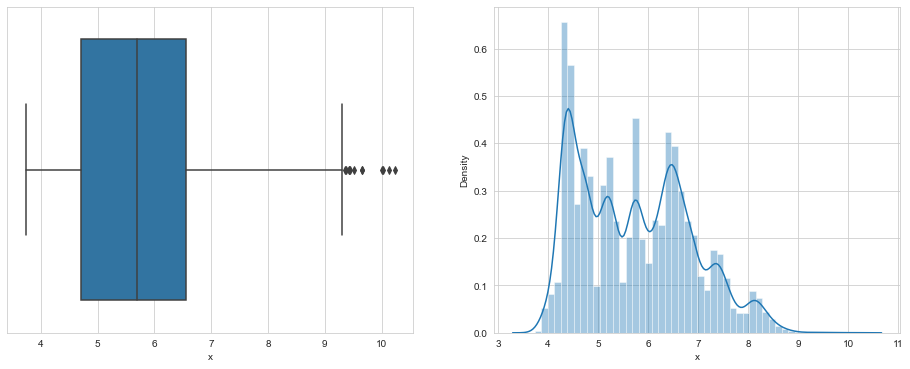

In [464]:
# Column distribution before cleaning
initial_data(gem_df['x'])

In [465]:
# Getting IQR values for X
quartile_values(gem_df['x'])

Interquartile range 1.8399999999999999
Upper Bound 9.309999999999999
Lower Bound1.9500000000000002


In [468]:
# getting outliers for X variable
outliers(gem_df['x'])

3026     10.02
8157     10.01
8574      9.65
12501    10.23
12759     9.42
15081     9.66
15489     9.36
16539     9.38
17077     9.42
19762     9.51
20506    10.14
26870     9.44
Name: x, dtype: float64

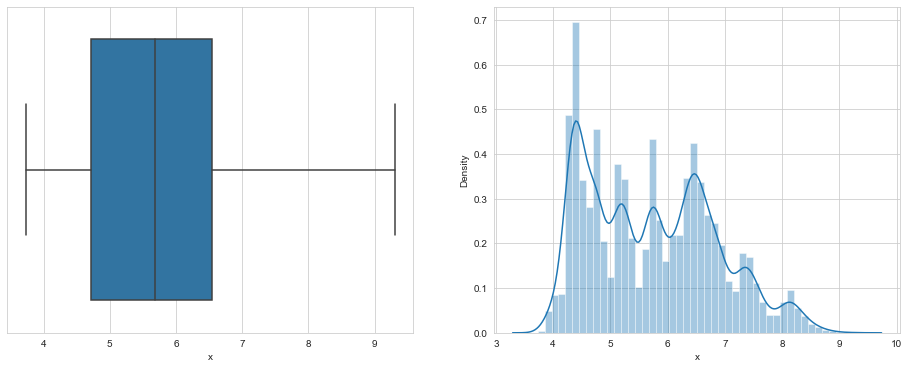

In [467]:
# removing outliers and plotting the boxplot and Getting distribution curve
rem_outliers(gem_df['x'])

Outliers are removed; two peaks in distribution curve.

#### 5. Y variable

y variable has a skew of 3.8886071160379294 where median is 5.7 and mean is 5.7331520891364525


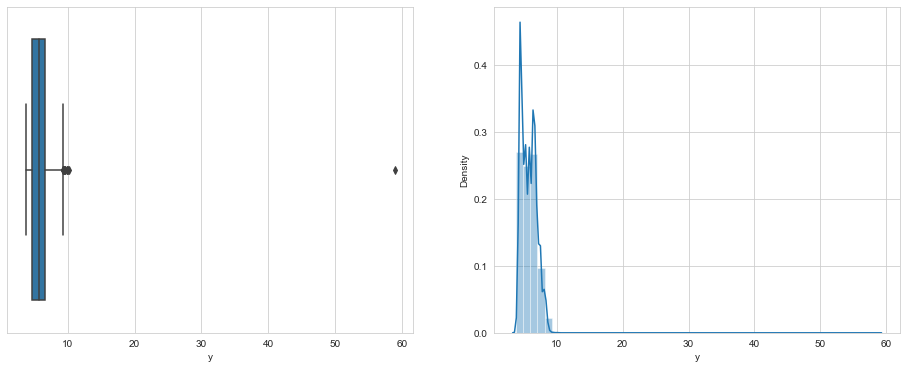

In [469]:
# Column distribution before cleaning
initial_data(gem_df['y'])

In [470]:
# Getting IQR values for Y
quartile_values(gem_df['y'])

Interquartile range 1.83
Upper Bound 9.285
Lower Bound1.9649999999999999


In [471]:
# getting outliers for Y variable
outliers(gem_df['y'])

3026      9.94
8157      9.94
8574      9.59
12501    10.16
12759     9.34
15081     9.63
15489     9.31
16539     9.31
19762     9.46
20506    10.10
25796    58.90
26870     9.40
Name: y, dtype: float64

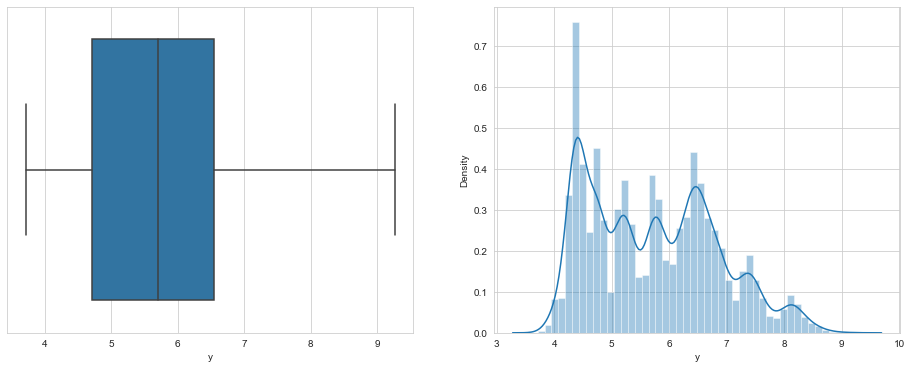

In [472]:
# removing outliers and plotting the boxplot and Getting distribution curve
rem_outliers(gem_df['y'])

Outliers are removed; two peaks in distribution curve-> Similar to X

#### 6. Z variable

z variable has a skew of 2.639528605523809 where median is 3.52 and mean is 3.538820427112348


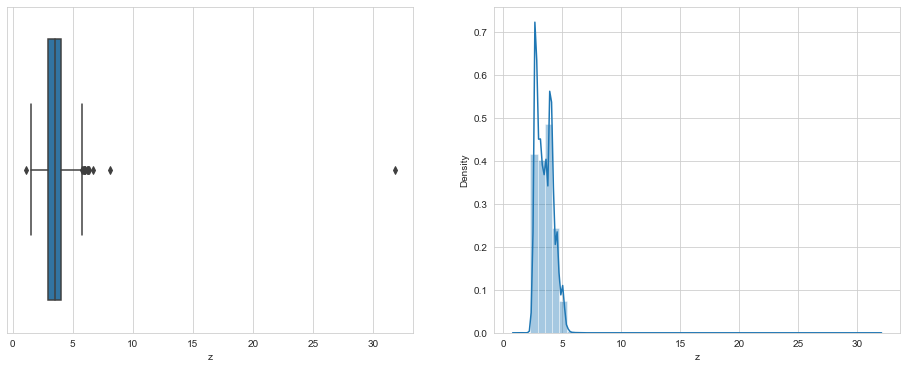

In [473]:
# Column distribution before cleaning
initial_data(gem_df['z'])

In [474]:
# Getting IQR values for Z
quartile_values(gem_df['z'])

Interquartile range 1.1400000000000001
Upper Bound 5.75
Lower Bound1.1899999999999997


In [475]:
# getting outliers for Z variable
outliers(gem_df['z'])

345      31.80
670       5.75
1073      5.90
3026      6.24
8157      6.31
8206      5.90
8574      6.03
12501     6.72
12759     6.27
15081     6.03
16873     5.77
20506     6.17
21605     1.07
25796     8.06
26870     5.85
Name: z, dtype: float64

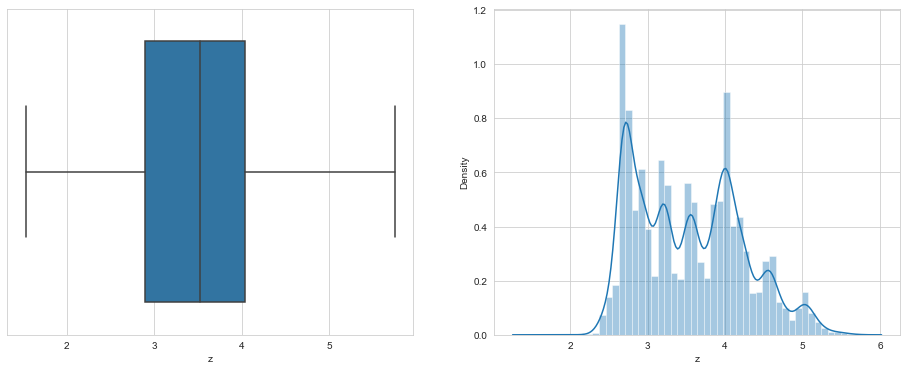

In [476]:
# removing outliers and plotting the boxplot and Getting distribution curve
rem_outliers(gem_df['z'])

Outliers are removed; two peaks in distribution curve-> Similar to X and Y

Since, x, y and z are dimnesional values and are interdependent, their distribution pf values across the axis is also similar.

#### 7. Price Variable

price variable has a skew of 1.6190546077555819 where median is 2373.0 and mean is 3936.249990714949


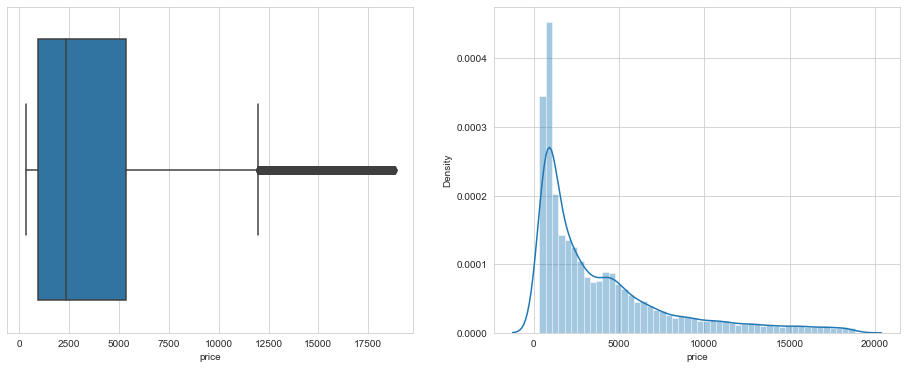

In [477]:
# Column distribution before cleaning
initial_data(gem_df['price'])

In [478]:
# Getting IQR values for price
quartile_values(gem_df['price'])

Interquartile range 4408.0
Upper Bound 11965.0
Lower Bound-5667.0


In [479]:
# getting outliers for price variable
outliers(gem_df['price'])

45       12554
63       17273
103      16789
123      12681
125      15030
         ...  
26908    14404
26916    13162
26925    14720
26935    13393
26958    17805
Name: price, Length: 1778, dtype: int64

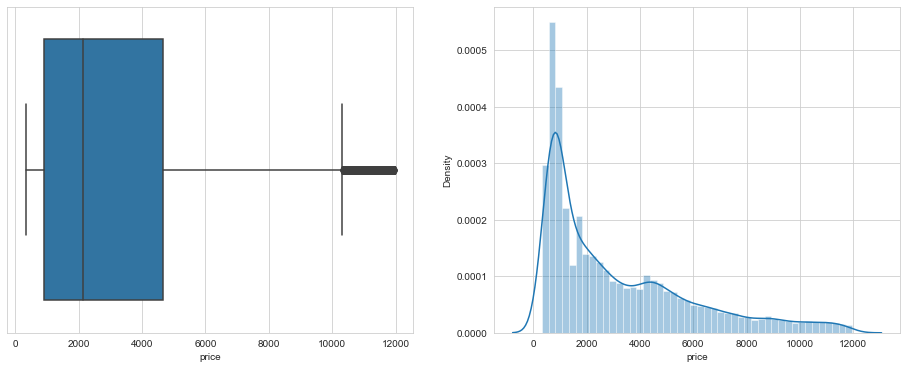

In [480]:
# removing outliers and plotting the boxplot and Getting distribution curve
rem_outliers(gem_df['price'])

Still some outliers left, but amout has decreased significantly.

Distribution more closer to normal.

#### 8. CUT- Categorical Variable #1

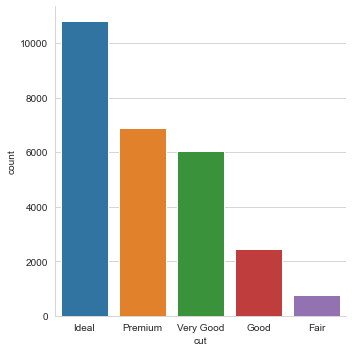

In [481]:
# Visualizing using count plot
sns.catplot(x='cut', data=gem_df,kind='count')

#### 9. COLOR - Categorical Variable #2

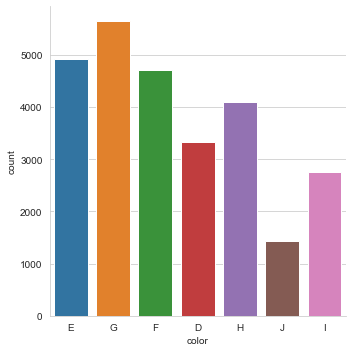

In [482]:
sns.catplot(x='color', data=gem_df,kind='count')

#### 10. CLARITY - Categorical Variable #

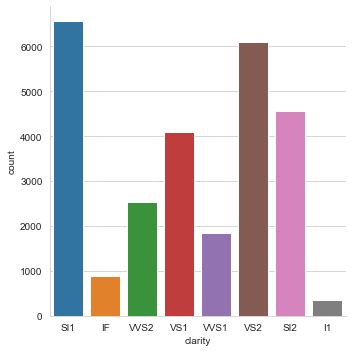

In [483]:
sns.catplot(x='clarity', data=gem_df,kind='count')

Findings:-



1. Cut - Most diamonds are Ideal Cut, followed by Premium Cut and Very Good Cut.

2. Color - Most diamonds have G (4th in rank) color, followed by E and F. Around 3000 diamonds are D( best ) in color, while around 1500 are J ( worst ) coloured

3. Clarity - There are no Flawless clarity( FL ) diamonds. SI1 is the highest followed by VS2.

### **Bivariate and Multivariate Analysis**

#### Categorical Variables

<AxesSubplot:xlabel='clarity', ylabel='price'>

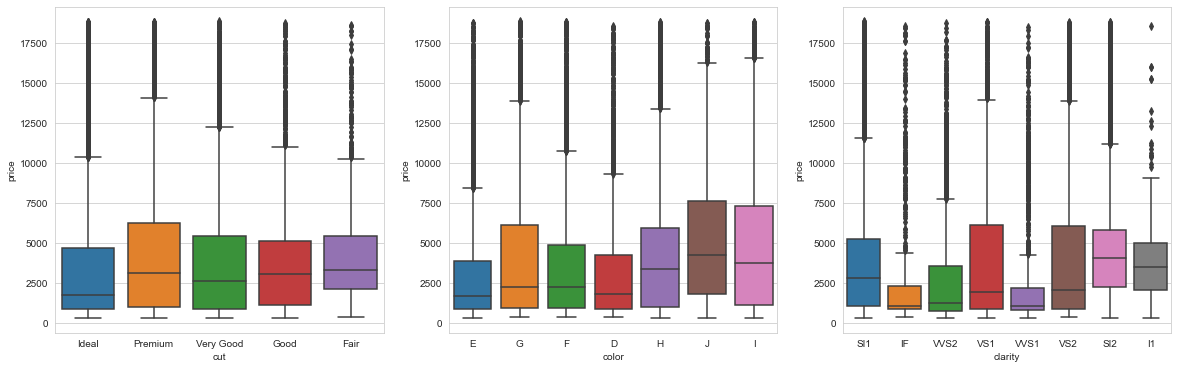

In [496]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 6))
sns.boxplot(x='cut',y='price',data=gem_df,ax=axs[0])
sns.boxplot(x='color',y='price',data=gem_df,ax=axs[1])
sns.boxplot(x='clarity',y='price',data=gem_df,ax=axs[2])

Findings:-

 Diamonds with premium cuts or color 'J'/'I' or VS1/VS2 clarity have the highest prices.



#### Numerical Variables

 **Finding correlaton between variables**

Text(0.5, 1.0, 'Correlation heatmap')

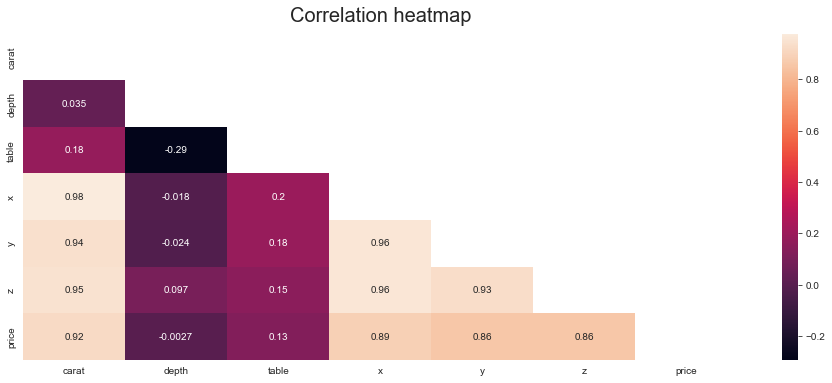

In [499]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(gem_df.corr(), dtype=bool))
heatmap=sns.heatmap(gem_df.corr(),mask=mask,annot=True)
heatmap.set_title('Correlation heatmap',fontdict={'fontsize':20}, pad=12)

Findings:-

1. Carat is highly correlated with x,y and z fetaures which is true since generally, carat(wieght of a diamond) is dependent on the size.

2. Other variables like table and depth don't correlate much with others.

**Finding correlation between Price and all other variables**

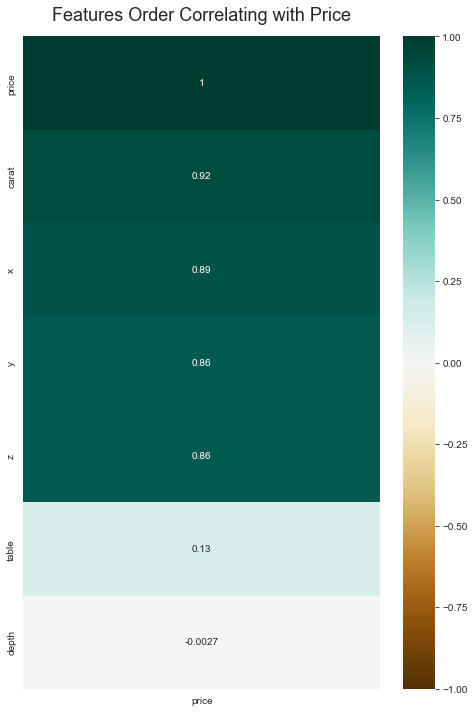

In [500]:
plt.figure(figsize=(8, 12))
corr=gem_df.corr()[['price']].sort_values(by='price', ascending=False)
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Order Correlating with Price', fontdict={'fontsize':18}, pad=16);

Findings:-

Price is highly correlated with carat, followed by dimensional variables. While, depth is negatively correlated with price

**Plotting all variables against price**

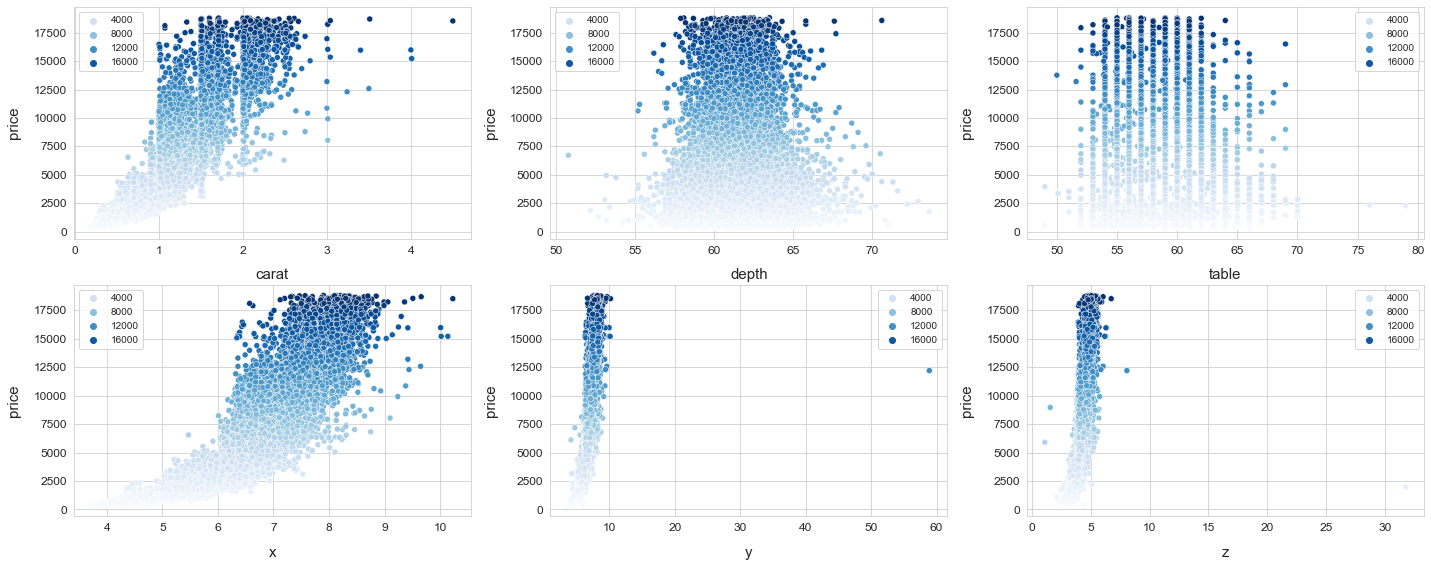

In [501]:
# removing price from numric_cols list
numeric_cols.remove('price')
# plotting all the numeric columns vs price
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 12))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(gem_df[numeric_cols]), 1):
    plt.subplot(len(list(numeric_cols)), 3, i)
    sns.scatterplot(x=feature, y='price', hue='price', palette='Blues', data=gem_df)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('price', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()


Hence, we can infer from these curves:

i) Carat and Price have a linear relationship. As carat increases, price also increases.

ii) Similarly, x and Price also have a linear relation.

iii) For small change in y and z values, Price increases significantly.

iv) Depth and table do not show any relation with Price. 

**Plotting all the variables against each other**

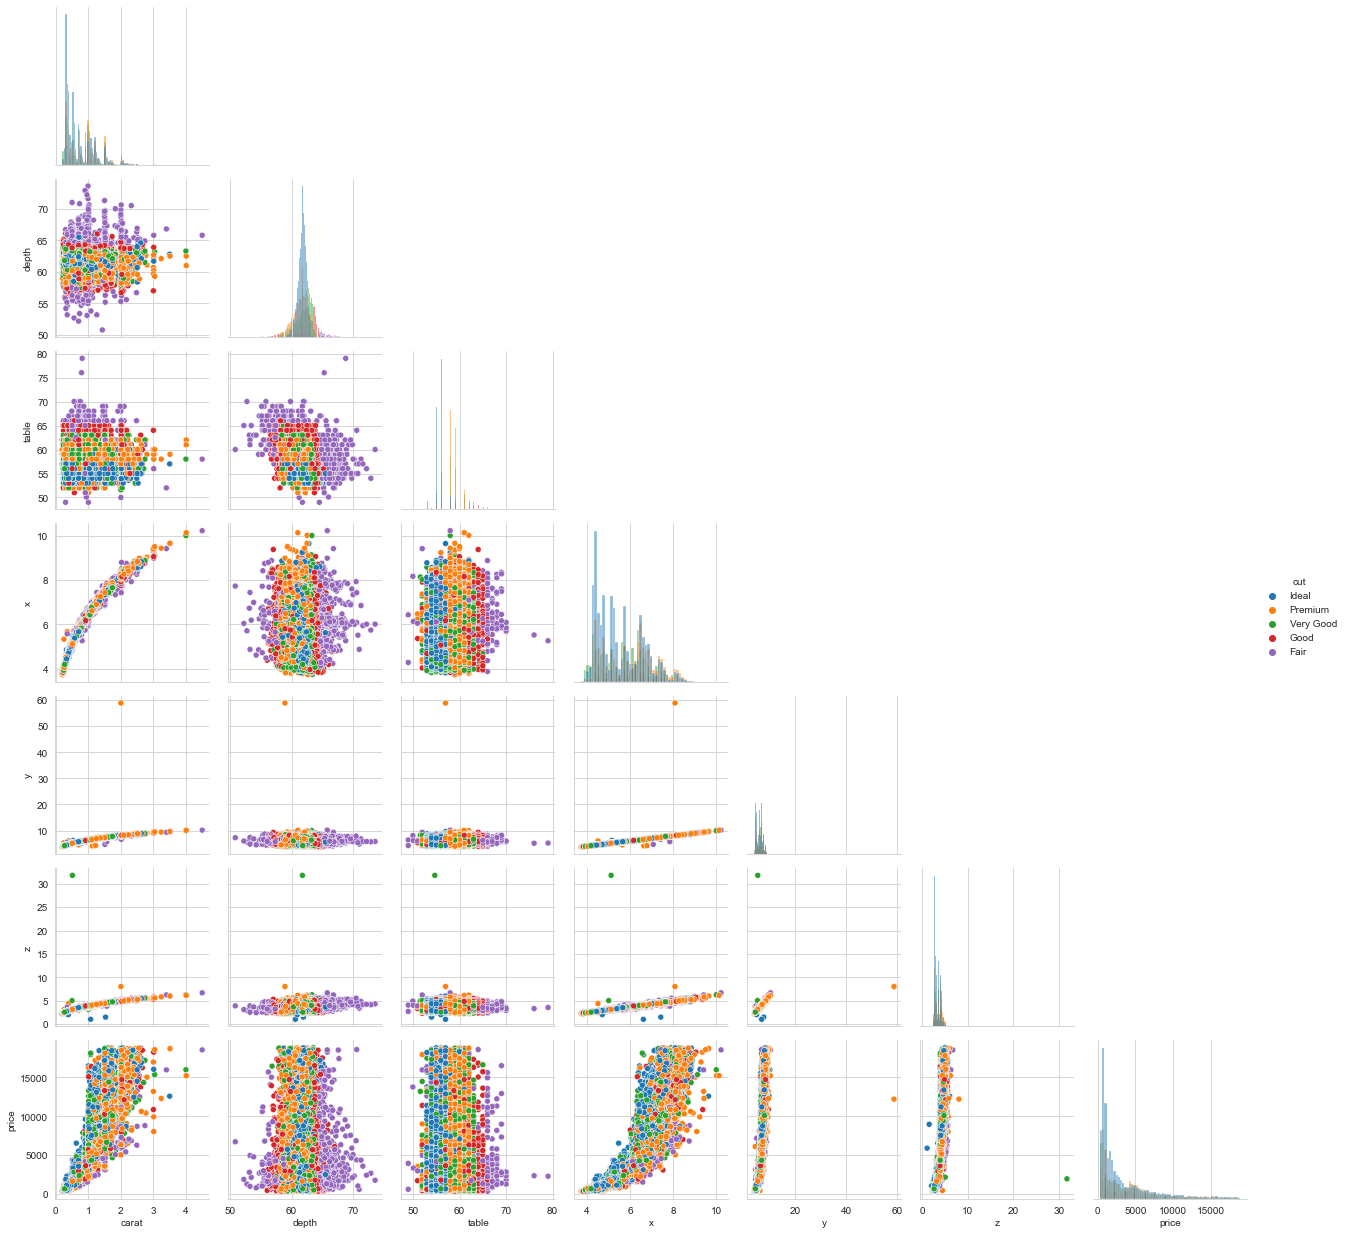

In [502]:
g=sns.PairGrid(gem_df,diag_sharey=False,corner=True,hue='cut')
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)
g.add_legend()

Findings:-

1. We can see that for the Depth and Table curves, the purple hue( for Fair cuts) is mostly on the outer side of the distribution. Meaning Fair cut diamonds either have very low or very high values for depth and table.

2. Also, we can see that similar colors are packed almost together in the curves and are not distributed throughout the area of the curve. Implying that similar cuts diamonds have similar features.